### EDA

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df =pd.read_csv('hotel_bookings.csv')
df.shape

(119390, 32)

In [43]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [45]:
df=df.drop(['company'],axis=1)

In [46]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [47]:
median1=df['children'].median()
median1

0.0

In [48]:
mean1 =df['children'].mean()
mean1


0.10388990333874994

In [49]:
df['children'].replace(np.nan,mean1,inplace=True)
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [50]:
median2=df['agent'].median()
median2

14.0

In [51]:
df['agent'].replace(np.nan,median2,inplace=True)

In [52]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [53]:
mode1=df['country'].mode().values[0]

In [54]:
mode1

'PRT'

In [55]:
df['country'].replace(np.nan,mode1,inplace=True)

In [56]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

##### Check For Duplicates


In [57]:
duplicate=df.duplicated()

duplicate.sum()

32020

In [58]:
df.drop_duplicates(inplace=True)

In [59]:
df.duplicated().sum()

0

In [60]:
df.shape

(87370, 31)

#### OUTLIER

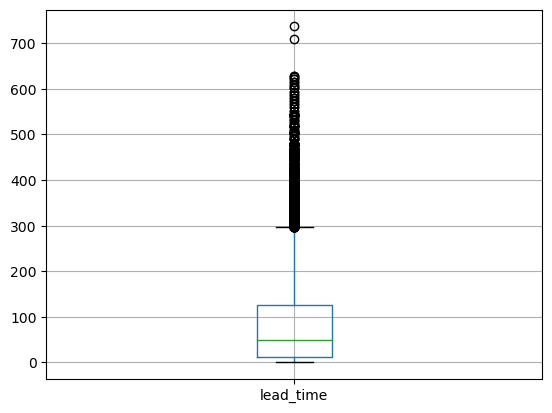

In [65]:
df.boxplot(column=['lead_time'])
plt.show()

In [73]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [75]:
low_leadtime,high_leadtime=remove_outlier(df['lead_time'])
df['lead_time']=np.where(df['lead_time']>high_leadtime,high_leadtime,df['lead_time'])
df['lead_time']=np.where(df['lead_time']<low_leadtime,low_leadtime,df['lead_time'])


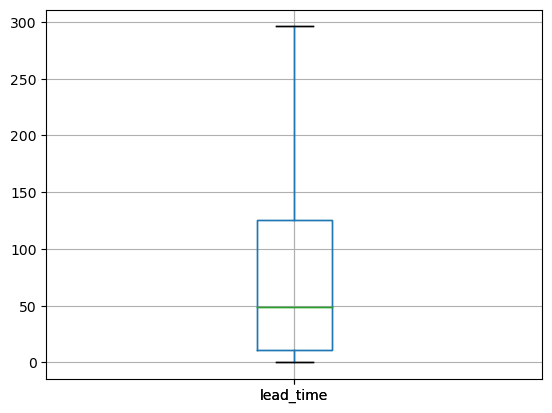

In [77]:
df.boxplot(column=['lead_time'])
plt.show()

### One-Hot Encoding

In [78]:
df=pd.get_dummies(df,columns=['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','reservation_status_date'])

In [79]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status_date_9/26/2015,reservation_status_date_9/26/2016,reservation_status_date_9/27/2015,reservation_status_date_9/27/2016,reservation_status_date_9/28/2015,reservation_status_date_9/28/2016,reservation_status_date_9/29/2015,reservation_status_date_9/29/2016,reservation_status_date_9/30/2015,reservation_status_date_9/30/2016
0,0,296.0,2015,27,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,296.0,2015,27,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,7.0,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,13.0,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,14.0,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df.dtypes

is_canceled                            int64
lead_time                            float64
arrival_date_year                      int64
arrival_date_week_number               int64
arrival_date_day_of_month              int64
                                      ...   
reservation_status_date_9/28/2016      uint8
reservation_status_date_9/29/2015      uint8
reservation_status_date_9/29/2016      uint8
reservation_status_date_9/30/2015      uint8
reservation_status_date_9/30/2016      uint8
Length: 1186, dtype: object

In [81]:
df.shape

(87370, 1186)